In [273]:
import json
import folium
import os
import re
import sys
mod = sys.modules[__name__]
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
plt.style.use('ggplot')

import geopandas as gpd
import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)
import warnings
warnings.filterwarnings(action='ignore')
pd.options.display.float_format = '{:.2f}'.format


# 목차 
1. 파일 정리
    - 노원구 기준으로 정리하자
2. 지도 그리기
    - folium 따라 ㄲ

In [9]:
data_dir_dong= 'Data/bnd_dong_00_2019_2019'
data_dir_si= 'Data/bnd_sido_00_2019_2019'
data_dir_sigungu= 'Data/bnd_sigungu_00_2019_2019'

In [10]:
Dong = gpd.read_file(os.path.join(data_dir_dong,'bnd_dong_00_2019_2019_2Q.shp'),encoding = 'cp949')

In [11]:
Dong.head()

,base_date,adm_dr_cd,adm_dr_nm,geometry
0,20190630,3401111,목천읍,"POLYGON ((976281.256 1872572.889, 976310.111 1..."
1,20190630,3401131,풍세면,"POLYGON ((968741.044 1858717.018, 968735.892 1..."
2,20190630,3401132,광덕면,"POLYGON ((963262.901 1858071.870, 963324.231 1..."
3,20190630,3401133,북면,"POLYGON ((981373.134 1877117.916, 981422.790 1..."
4,20190630,3401134,성남면,"POLYGON ((975389.272 1862541.207, 975396.147 1..."


In [100]:
for i in Dong.adm_dr_nm:
    if '상계' in i:
        print(i)

상계1동
상계2동
상계5동
상계8동
상계9동
상계10동
상계3·4동
상계6·7동


In [101]:
A = '월계1동,월계2동,월계3동,공릉1동,공릉2동,하계1동,하계2동,중계본동,중계1동,중계4동,중계2·3동,상계1동,상계2동,상계3·4동,상계5동,상계6·7동,상계8동,상계9동,상계10동'

In [102]:
Nowon_list = A.split(',')

In [104]:
data_list= []
for i in Nowon_list:
    data_list.append(Dong[Dong.adm_dr_nm == i])

In [105]:
# 노원구 파일 정리
Nowon_data = pd.concat(data_list,axis = 0)

In [106]:
Nowon_data

,base_date,adm_dr_cd,adm_dr_nm,geometry
1583,20190630,1111051,월계1동,"POLYGON ((961244.838 1958390.434, 961249.663 1..."
1584,20190630,1111052,월계2동,"POLYGON ((960399.556 1960697.959, 960404.525 1..."
1585,20190630,1111053,월계3동,"POLYGON ((962011.797 1958406.784, 962024.523 1..."
1601,20190630,1111079,공릉1동,"POLYGON ((961937.037 1959205.293, 961937.677 1..."
1586,20190630,1111056,공릉2동,"POLYGON ((965671.165 1959936.889, 965675.978 1..."
1587,20190630,1111058,하계1동,"POLYGON ((962439.375 1960842.803, 962494.535 1..."
1588,20190630,1111059,하계2동,"POLYGON ((961291.710 1959844.399, 961298.385 1..."
1589,20190630,1111060,중계본동,"POLYGON ((964042.704 1961855.373, 964082.715 1..."
1590,20190630,1111061,중계1동,"POLYGON ((962641.542 1960852.799, 962639.467 1..."
1591,20190630,1111064,중계4동,"POLYGON ((962557.140 1961767.184, 962462.236 1..."


In [130]:
# 저장
Nowon_data.to_csv('Data/Nowon_data.csv')

<Figure size 1440x1080 with 0 Axes>

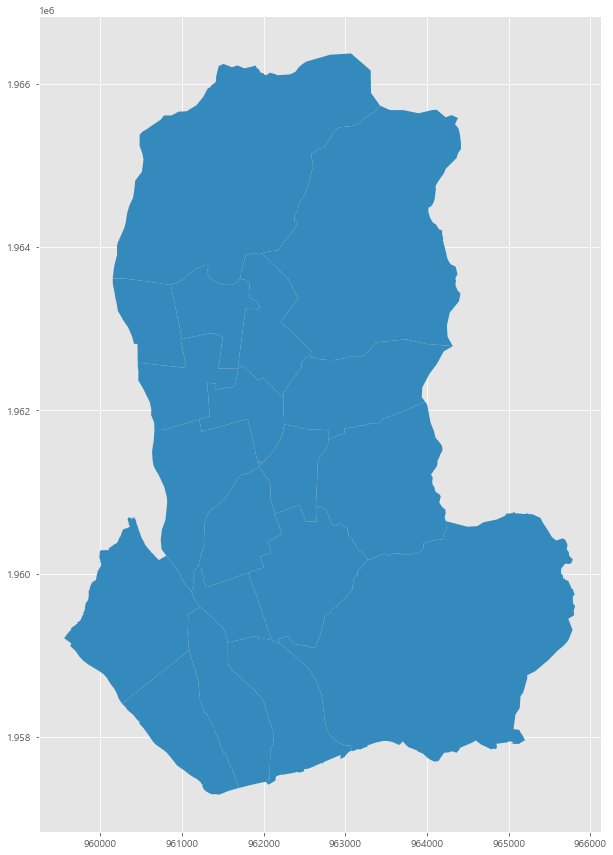

In [107]:
# 정확히 나왔는지 시각화로 파악
plt.figure(figsize = (20,15))
Nowon_data.plot(figsize = (20,15))

##### 시 단위 데이터 호출
 - 데이터 확인하기 위해 호출했음. 별 의미 없음

In [12]:
Si = gpd.read_file(os.path.join(data_dir_si,'bnd_sido_00_2019_2019_2Q.shp'),encoding = 'cp949')

In [13]:
Si.head()

,base_date,sido_cd,sido_nm,geometry
0,20190630,11,서울특별시,"POLYGON ((957671.417 1966936.577, 957875.281 1..."
1,20190630,21,부산광역시,"MULTIPOLYGON (((1132672.872 1655372.494, 11326..."
2,20190630,22,대구광역시,"POLYGON ((1107777.596 1780522.263, 1107845.409..."
3,20190630,23,인천광역시,"MULTIPOLYGON (((847446.189 1882697.601, 847446..."
4,20190630,24,광주광역시,"POLYGON ((932712.688 1696168.692, 932781.680 1..."


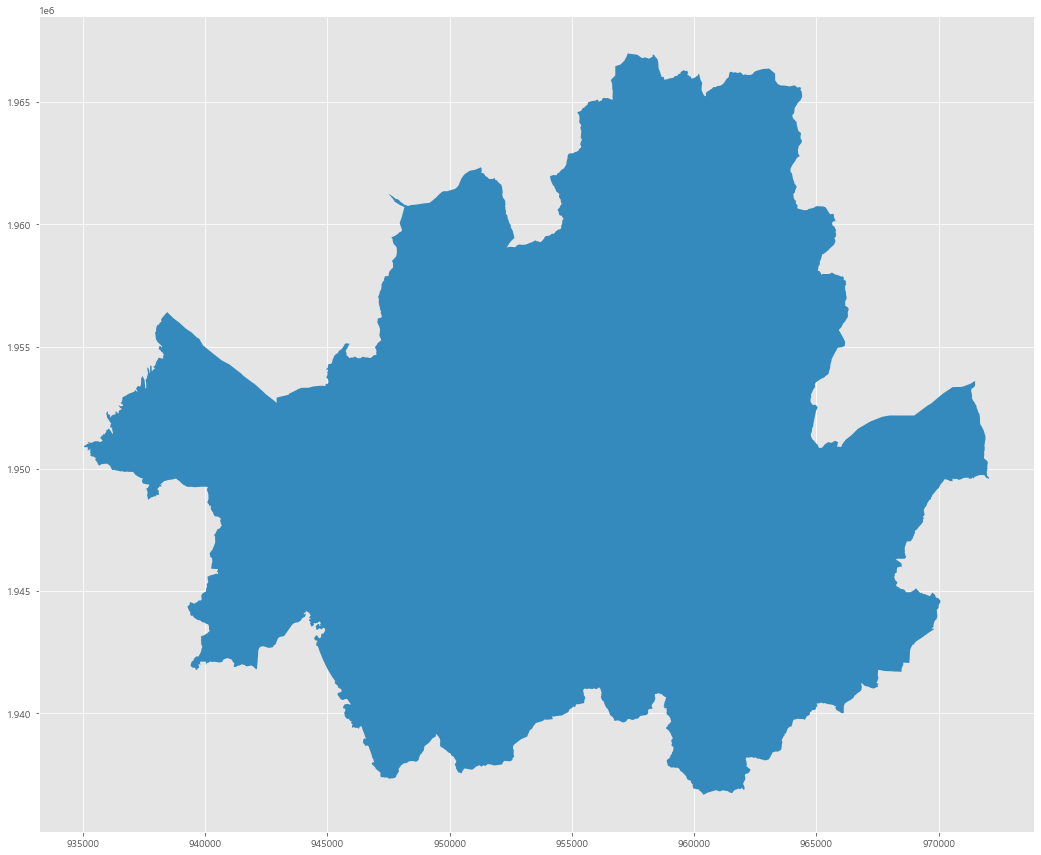

In [85]:
Si[Si.sido_nm == '서울특별시'].plot(figsize = (20,15))

##### 시군구 데이터
- 위에 '동'데이터가 잘 호출 되었는지 비교 차원에서 확인해봤음

In [15]:
Sigungu = gpd.read_file(os.path.join(data_dir_sigungu,'bnd_sigungu_00_2019_2019_2Q.shp'),encoding = 'cp949')

In [16]:
Sigungu.head()

,base_date,sigungu_cd,sigungu_nm,geometry
0,20190630,11010,종로구,"POLYGON ((953683.828 1959209.872, 953647.333 1..."
1,20190630,11020,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,20190630,11030,용산구,"POLYGON ((953114.222 1950746.999, 953114.206 1..."
3,20190630,11040,성동구,"POLYGON ((959381.837 1952723.894, 959416.042 1..."
4,20190630,11050,광진구,"POLYGON ((964825.058 1952633.250, 964875.565 1..."


In [86]:
Sigungu[Sigungu.sigungu_nm == '노원구']

,base_date,sigungu_cd,sigungu_nm,geometry
10,20190630,11110,노원구,"POLYGON ((963311.305 1966160.852, 963313.666 1..."


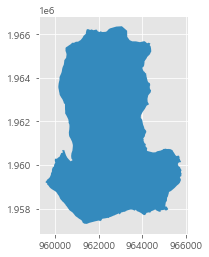

In [87]:
Sigungu[Sigungu.sigungu_nm =='노원구'].plot()

노원구 위 아래 지도 대비 결과 이상없음 <br>
처음에 상계6,7동 상계3,4동 중계2,3동 표현상 특수문자 첨가 때문에 지도 불러올 때 오류 발생, 현재 해결

## 유동인구 파악

##### 데이터 호출 및 정제

In [112]:
Flow = pd.read_csv('Input/Flow_SK/Four_Region_Flow_TIme.csv',index_col = [0])

In [166]:
# sort = None 하면 순서가 바뀌니까 조심!
Flow_columns = Flow.columns.difference(['STD_YMD'],sort = False)

In [167]:
Flow_columns

Index(['STD_YM', 'HDONG_CD', 'HDONG_NM', 'TMST_00', 'TMST_01', 'TMST_02',
       'TMST_03', 'TMST_04', 'TMST_05', 'TMST_06', 'TMST_07', 'TMST_08',
       'TMST_09', 'TMST_10', 'TMST_11', 'TMST_12', 'TMST_13', 'TMST_14',
       'TMST_15', 'TMST_16', 'TMST_17', 'TMST_18', 'TMST_19', 'TMST_20',
       'TMST_21', 'TMST_22', 'TMST_23'],
      dtype='object')

In [170]:
# 연도-월 단위로만 표현
Flow = Flow[Flow_columns]
Flow

,STD_YM,HDONG_CD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
0,201902,1114052000,소공동,1496.35,1022.83,706.51,547.77,1673.02,3561.05,9195.82,...,12355.91,13096.69,9317.64,15029.74,14135.83,9074.02,6032.26,6047.05,4806.65,2956.11
1,201902,1114054000,회현동,1692.37,1117.26,839.57,653.41,1920.52,4687.95,10936.47,...,18210.30,20292.65,12527.29,21454.63,18214.50,11914.26,9800.64,9341.24,6884.91,4034.56
2,201902,1114055000,명동,2226.91,1726.10,1145.43,894.97,2513.32,5268.51,13857.93,...,20332.71,21458.64,14434.56,25855.14,23107.23,13460.05,9797.40,8719.30,7203.45,4845.48
3,201902,1114057000,필동,698.73,440.70,385.99,275.64,497.41,1990.42,4679.79,...,6900.66,9789.54,6205.74,13277.25,12101.51,5698.58,4464.46,4088.53,3385.14,1746.28
4,201902,1114058000,장충동,768.34,447.23,429.90,349.46,507.74,1310.67,2956.49,...,5187.02,5211.60,3656.54,6841.98,5810.71,4463.99,2807.25,2626.12,2415.41,1398.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16624,202005,2726066100,범물1동,598.19,402.80,293.56,208.36,194.74,293.63,486.90,...,2236.45,2559.72,2519.71,2341.32,2344.67,2002.38,1815.54,1398.37,996.67,592.60
16625,202005,2726066200,범물2동,860.02,797.33,714.27,645.72,635.94,680.46,722.07,...,1210.35,1242.19,1273.39,1262.05,1276.90,1255.39,1253.99,1139.82,1035.93,903.40
16626,202005,2726067000,고산1동,2934.21,2235.49,1632.46,1485.80,1279.89,1498.19,2180.28,...,8255.96,8269.57,8484.01,8634.74,8781.90,8150.37,7550.56,6208.88,5092.64,3983.79
16627,202005,2726068000,고산2동,3332.81,2218.75,1566.97,1167.14,1132.96,1549.44,2976.40,...,16017.45,16587.97,17122.82,16311.76,14701.17,13293.80,11671.12,9868.01,7015.46,4513.15


In [172]:
Nowon_list_2 = ['월계1동',
 '월계2동',
 '월계3동',
 '공릉1동',
 '공릉2동',
 '하계1동',
 '하계2동',
 '중계본동',
 '중계1동',
 '중계4동',
 '중계2.3동',
 '상계1동',
 '상계2동',
 '상계3.4동',
 '상계5동',
 '상계6.7동',
 '상계8동',
 '상계9동',
 '상계10동']

In [173]:
Flow_list = []
for i in Nowon_list_2:
    Flow_list.append(Flow[Flow.HDONG_NM == i])

In [174]:
Nowon_Flow = pd.concat(Flow_list,axis = 0)

데이터를 정제하다보니 법정동코드로 되어있다. <br> 
이를 법정동 코드를 전부 행정동 코드로 바꿔보자

In [175]:
H_code = [1135056000,1135057000,1135058000,1135059500,1135060000,1135061100,1135061200,1135061900,1135062100,1135062400,1135062500,1135063000,1135064000,1135066500,1135067000,1135069500,1135070000,1135071000,1135072000]

In [180]:
dict_Nowon = dict(zip(Nowon_list_2,H_code))

In [181]:
HJcode_trans = Nowon_Flow.HDONG_NM.apply(lambda x : dict_Nowon[x])

In [183]:
Nowon_Flow

,STD_YM,HDONG_CD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
15,201902,1135056000,월계1동,980.11,594.96,443.08,372.86,496.38,1451.65,2446.45,...,4325.66,5731.17,4243.86,7227.98,7125.89,5379.34,4738.75,3471.75,4286.04,2051.92
84,201902,1135056000,월계1동,1137.55,758.96,635.03,445.23,460.40,1450.86,1254.77,...,4781.28,4508.91,5702.50,5848.62,4460.84,4302.96,4141.37,3423.24,3127.68,1653.56
153,201902,1135056000,월계1동,1071.24,691.76,548.32,360.72,440.25,804.05,789.63,...,4092.27,4343.03,4693.27,3980.62,3572.59,2774.97,2869.69,2572.28,2098.78,1268.82
222,201902,1135056000,월계1동,742.68,495.06,381.87,334.17,316.06,848.97,719.56,...,3512.07,3693.05,4332.41,4041.91,3383.85,2903.27,2876.76,2327.76,1904.11,1004.08
291,201902,1135056000,월계1동,666.94,450.90,264.78,242.86,259.54,1056.49,1576.15,...,5324.11,5666.93,5650.92,5448.76,3753.67,3540.72,3468.41,2868.58,2296.14,1370.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16317,202005,1135072000,상계10동,526.50,306.80,212.48,185.12,198.11,460.44,820.96,...,1859.85,2144.51,2206.98,2382.86,2857.28,2553.56,1805.99,1533.32,1555.04,992.79
16386,202005,1135072000,상계10동,580.92,335.48,268.36,203.05,212.62,495.44,824.10,...,1872.53,1934.85,2155.94,2466.64,2776.55,2539.54,1781.59,1437.23,1414.54,947.89
16455,202005,1135072000,상계10동,546.81,331.68,254.87,207.21,220.84,424.12,802.17,...,1939.32,2124.01,2192.16,2561.72,2862.79,2609.14,2051.38,1607.75,1576.61,1122.49
16524,202005,1135072000,상계10동,674.02,465.30,315.24,238.59,215.12,407.86,591.97,...,2377.57,2352.16,2402.33,2634.94,2396.65,1942.30,1575.89,1599.55,1499.48,910.01


In [187]:
# 데이터 저장
Nowon_Flow.to_csv('Data/Nowon_Flow.csv')

In [188]:
# 월 단위로 유동인구를 표현(30일의 유동인구를 평균하여 월 단위 유동인구로 표현)
Nowon_1 = Nowon_Flow.groupby(['STD_YM','HDONG_CD','HDONG_NM'],as_index = False).mean()
Nowon_1

,STD_YM,HDONG_CD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
0,201902,1135056000,월계1동,893.60,572.07,418.63,372.28,445.08,1218.26,2145.09,...,4381.04,4807.52,5355.81,5713.40,6487.46,4897.89,4004.45,3531.47,3433.52,1738.95
1,201902,1135057000,월계2동,765.82,548.14,390.25,381.66,407.66,732.74,1155.22,...,2719.92,2888.88,2893.75,3184.23,3322.77,2737.45,2420.93,2219.74,1927.51,1313.34
2,201902,1135058000,월계3동,1566.98,1053.53,774.33,727.83,815.63,1650.05,2839.94,...,6634.59,6885.04,6878.20,7464.69,7504.43,6055.95,5400.34,4908.39,4180.04,2607.32
3,201902,1135059500,공릉1동,2820.99,1888.56,1457.27,1245.85,1411.42,2851.11,4617.11,...,10129.11,10767.28,11237.27,12656.22,13659.07,10323.39,8784.48,8199.14,7018.56,4660.57
4,201902,1135060000,공릉2동,2578.17,1787.49,1372.81,1228.24,1430.97,2574.26,4661.16,...,11054.96,11208.27,11167.14,11943.24,11339.16,8926.29,7596.15,7125.37,5757.29,3879.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,202005,1135067000,상계5동,688.23,467.80,324.34,262.68,253.65,361.00,586.20,...,1957.83,2088.28,2246.12,2490.29,2773.77,2710.43,2138.24,1928.93,1916.36,1533.52
148,202005,1135069500,상계6.7동,2981.85,2070.96,1456.69,1462.84,1225.42,2238.01,4344.46,...,12594.04,13024.36,13588.08,14320.48,14634.37,12585.34,10410.50,9169.68,7925.54,5329.41
149,202005,1135070000,상계8동,945.29,686.56,553.16,489.43,496.86,743.27,1028.94,...,2881.99,3060.37,3252.43,3422.67,3566.99,3407.21,2936.27,2649.79,2262.48,1592.47
150,202005,1135071000,상계9동,500.40,313.45,221.26,178.29,166.60,292.62,466.46,...,1428.73,1537.45,1675.63,1849.22,2090.34,2011.36,1537.67,1320.38,1204.86,869.72


In [190]:
# 2020년 5월만을 봐보자.
Nowon_202005 = Nowon_1[Nowon_1.STD_YM == 202005]
Nowon_202005

,STD_YM,HDONG_CD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
133,202005,1135056000,월계1동,1283.48,925.03,762.02,669.15,710.60,1034.43,1610.17,...,3319.89,3468.35,3957.11,4187.14,4939.79,4573.37,3569.99,3217.08,2753.04,2144.37
134,202005,1135057000,월계2동,1349.34,1204.39,1112.36,1092.53,1108.08,1217.66,1375.20,...,1910.82,2000.15,2074.88,2152.42,2300.67,2252.16,2080.21,2014.16,1744.84,1553.24
135,202005,1135058000,월계3동,1977.35,1498.98,1130.88,983.48,1032.13,1579.50,2528.24,...,5815.58,6093.61,6362.97,6734.27,7034.50,6478.61,5495.95,5232.28,4445.54,3186.64
136,202005,1135059500,공릉1동,2823.78,2000.41,1566.06,1332.39,1319.98,2023.76,3772.49,...,8560.42,9130.81,9825.63,10967.89,12270.31,11370.74,8505.64,7659.96,6785.16,4867.77
137,202005,1135060000,공릉2동,2488.90,1819.26,1291.68,1110.13,1153.74,2043.60,3931.36,...,9562.55,10143.92,10336.47,11360.89,11419.45,9654.37,7636.66,6673.48,5887.13,4339.97
138,202005,1135061100,하계1동,924.50,562.95,375.76,291.55,336.11,625.80,1131.09,...,3589.66,3698.17,4016.91,4206.04,4340.32,3911.90,3165.00,2772.41,2682.13,1560.51
139,202005,1135061200,하계2동,1055.03,726.50,438.86,340.17,356.63,684.80,1484.97,...,3362.56,3593.52,3878.34,4325.89,4809.29,4402.35,3472.89,3220.44,2956.80,1961.12
140,202005,1135061900,중계본동,1415.31,1225.07,1129.58,1071.28,1063.81,1099.05,1196.44,...,2150.05,2238.98,2358.42,2606.66,2716.49,2655.97,2454.39,2390.92,2129.42,1700.53
141,202005,1135062100,중계1동,1274.91,1044.89,913.66,856.53,838.21,910.90,1024.53,...,2207.60,2356.74,2561.94,2996.16,3095.00,2854.43,2536.22,2381.81,1986.04,1493.10
142,202005,1135062400,중계4동,912.95,700.01,560.86,481.70,485.81,613.65,867.66,...,2188.42,2293.37,2371.90,2553.55,2745.81,2625.76,2042.01,1773.89,1649.89,1365.77


##### 실험데이터 모듈화

1. 법정동코드로 변환 & 시간별로 데이터 호출하게 끔 변경

In [263]:
Time_list = pd.Series(list(Nowon_202005.columns)[3:]).str[-2:].values

In [264]:
Time_list

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'], dtype=object)

In [256]:
def Collect_by_time(time):
    Test_data = Nowon_202005[['HDONG_CD',"TMST_{}".format(time)]]
    Test_data.HDONG_CD = Nowon_data.adm_dr_cd.values
    return Test_data

In [274]:
# 법정동 코드로 이 json이 작동하므로 법정동 코드로 변경
# 동적으로 변수 할당
for time in Time_list:
    setattr(mod,"Time_{}_data".format(time),Collect_by_time(time))

In [275]:
# 00 ~ 23까지 데이터 존재
Time_00_data

,HDONG_CD,TMST_00
133,1111051,1283.48
134,1111052,1349.34
135,1111053,1977.35
136,1111079,2823.78
137,1111056,2488.90
138,1111058,924.50
139,1111059,1055.03
140,1111060,1415.31
141,1111061,1274.91
142,1111064,912.95


## 지도그리기 임.

In [289]:
geo_path = 'Data/skorea-submunicipalities-2018-geo.json'
geo_str = json.load(open(geo_path,encoding = 'utf-8'))

In [290]:
len(geo_str['features'])

3504

##### json 수정

In [291]:
geo_test_str = geo_str

In [292]:
geo_list= []

In [293]:
want_data = Nowon_data[['adm_dr_cd','adm_dr_nm']]

In [294]:
want_data

,adm_dr_cd,adm_dr_nm
1583,1111051,월계1동
1584,1111052,월계2동
1585,1111053,월계3동
1601,1111079,공릉1동
1586,1111056,공릉2동
1587,1111058,하계1동
1588,1111059,하계2동
1589,1111060,중계본동
1590,1111061,중계1동
1591,1111064,중계4동


In [295]:
geo_copy = geo_str['features']

In [296]:
for i in range(3504):
    for j in want_data['adm_dr_nm'].values:
        if geo_copy[i]['properties']['name'] == j:
            geo_list.append(geo_test[i])

In [297]:
# 노원구만 확인 (19개 확인!)
len(geo_list)

19

In [298]:
geo_test_str['features'] = geo_list

In [309]:
def Nowon_Map(Time_data):
    seoul_map = folium.Map(location = [37.650641, 127.074564],zoom_start = 12,tiles = 'cartodbpositron')
    seoul_map.choropleth(geo_data = geo_test_str,
                        data = Time_data,
                        columns = list(Time_data.columns),
                        name = list(Time_data.columns)[1] ,
                        fill_color = 'PuRd',
                        key_on = 'properties.code',
                        highlight = True,
                        fill_opacity = 0.5, line_opacity = 1,
                        legend_name = 'Population per time')
    return seoul_map

In [311]:
# 00시
Nowon_Map(Time_00_data)

In [304]:
# 01시
Nowon_Map(Time_01_data)

참고자료(Folium) : https://dailyheumsi.tistory.com/m/144?category=854906<br>
참고자료2(Mapboxgl) : https://dailyheumsi.tistory.com/145?category=854906<br>
참고자료3(pydeck) : https://dailyheumsi.tistory.com/147?category=854906